In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tqdm import tqdm

In [2]:
df_stocks = pd.read_csv('../data/universe.csv')
df_stocks = df_stocks[df_stocks['class'] == 'Stock']
df_stocks.head()

,id,class,symbol,name
0,1,Stock,ABBV,AbbVie
1,2,Stock,ACN,Accenture
2,3,Stock,AEP,American Electric Power
3,4,Stock,AIZ,Assurant
4,5,Stock,ALLE,Allegion


In [3]:
ticker_list = df_stocks['symbol'].to_list()

In [4]:
price_to_book_list = []
book_value_list = []
roe_list = []
price_list = []
mkt_cap_list = []
shares_list = []

for i in tqdm(range(len(ticker_list))):
    t = ticker_list[i]
    tkr = yf.Ticker(t)
    
    try:
        price_to_book = tkr.info['priceToBook']
        book_value = tkr.info['bookValue']
        roe = tkr.info['returnOnEquity']
        price = tkr.info['currentPrice']
        mkt_cap = tkr.info['marketCap']
        shares = tkr.info['sharesOutstanding']
        
        price_to_book_list.append(price_to_book)
        book_value_list.append(book_value)
        roe_list.append(roe)
        price_list.append(price)
        mkt_cap_list.append(mkt_cap)
        shares_list.append(shares)
        
    except:
        print(t)
        price_to_book_list.append(0)
        book_value_list.append(0)
        roe_list.append(0)
        price_list.append(0)
        mkt_cap_list.append(0)
        shares_list.append(0)

100%|███████████████████████████████████████████| 50/50 [07:40<00:00,  9.21s/it]


In [5]:
df_stocks['priceToBook'] = price_to_book_list
df_stocks['bookValue'] = book_value_list
df_stocks['roe'] = roe_list
df_stocks['currentPrice'] = price_list
df_stocks['marketCap'] = mkt_cap_list
df_stocks['sharesOutstanding'] = shares_list

df_stocks['bookToMarket'] = df_stocks['bookValue'] / df_stocks['currentPrice']

In [6]:
df_stocks.head()

,id,class,symbol,name,priceToBook,bookValue,roe,currentPrice,marketCap,sharesOutstanding,bookToMarket
0,1,Stock,ABBV,AbbVie,17.381756,8.288,0.92706,144.06,2.547125e+11,1.768100e+09,0.057532
1,2,Stock,ACN,Accenture,8.062923,33.819,0.32139,272.68,1.726217e+11,6.325480e+08,0.124024
2,3,Stock,AEP,American Electric Power,2.143071,46.830,0.11211,100.36,5.155835e+10,5.137340e+08,0.466620
3,4,Stock,AIZ,Assurant,1.849114,83.732,0.09390,154.83,8.238396e+09,5.320930e+07,0.540800
4,5,Stock,ALLE,Allegion,10.140192,8.845,0.59294,89.69,7.878191e+09,8.783800e+07,0.098617


In [16]:
# df_stocks.to_csv('stocks_20220915.csv')

In [7]:
def calc_zscore(col):
    return (col - col.mean()) / col.std()

In [8]:
df_stocks.head()

,id,class,symbol,name,priceToBook,bookValue,roe,currentPrice,marketCap,sharesOutstanding,bookToMarket
0,1,Stock,ABBV,AbbVie,17.381756,8.288,0.92706,144.06,2.547125e+11,1.768100e+09,0.057532
1,2,Stock,ACN,Accenture,8.062923,33.819,0.32139,272.68,1.726217e+11,6.325480e+08,0.124024
2,3,Stock,AEP,American Electric Power,2.143071,46.830,0.11211,100.36,5.155835e+10,5.137340e+08,0.466620
3,4,Stock,AIZ,Assurant,1.849114,83.732,0.09390,154.83,8.238396e+09,5.320930e+07,0.540800
4,5,Stock,ALLE,Allegion,10.140192,8.845,0.59294,89.69,7.878191e+09,8.783800e+07,0.098617


In [9]:
df_stocks['z_value'] = calc_zscore(df_stocks['bookToMarket'])
df_stocks['z_size'] = -1*calc_zscore(df_stocks['marketCap']) # we want to short big companies
df_stocks['z_prof'] = calc_zscore(df_stocks['roe'])

array([[<AxesSubplot:title={'center':'z_size'}>]], dtype=object)

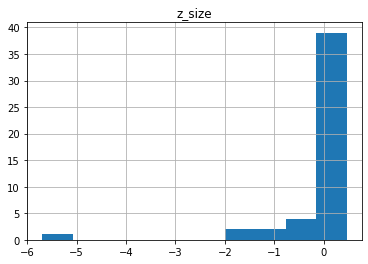

In [11]:
df_stocks[['z_size']].hist()

In [12]:
df_signals = df_stocks[['symbol', 'z_value', 'z_size', 'z_prof']]

In [13]:
df_signals = df_signals[
    (df_signals['z_value'].abs() < 3) & 
    (df_signals['z_size'].abs() < 3) & 
    (df_signals['z_prof'].abs() < 3)]

In [14]:
df_signals

,symbol,z_value,z_size,z_prof
0,ABBV,-0.579958,-0.756915,2.889256
1,ACN,-0.459754,-0.352894,0.194424
2,AEP,0.159584,0.242936,-0.736735
3,AIZ,0.293684,0.456142,-0.817757
4,ALLE,-0.505684,0.457914,1.402642
5,AMAT,-0.398567,0.108065,1.215370
6,AMP,-0.420418,0.351749,1.658524
8,AVB,0.015673,0.357686,-0.903452
9,AVY,-0.435772,0.427355,0.620937
10,AXP,-0.318592,-0.068176,0.152511


In [15]:
df_signals['valueRank'] = df_signals['z_value'].sort_values(ascending=False).index
df_signals['sizeRank'] = df_signals['z_size'].sort_values(ascending=False).index
df_signals['profRank'] = df_signals['z_prof'].sort_values(ascending=False).index

In [18]:
df_signals['rank'] = df_signals[['sizeRank', 'profRank', 'valueRank']].mean(axis=1)
df_signals['rankVar'] = df_signals[['sizeRank', 'profRank', 'valueRank']].var(axis=1)

In [45]:
long = df_signals.sort_values(by='rank').head()['symbol'].to_list()
short = df_signals.sort_values(by='rank').tail()['symbol'].to_list()

In [42]:
df_sub = pd.DataFrame(columns=['id', 'rank1', 'rank2', 'rank3', 'rank4', 'rank5', 'decision'])
df_sub['id'] = ticker_list
df_sub.iloc[:, 1:] = 0

In [49]:
df_sub.loc[df_sub['id'].isin(long), 'decision'] = 1/10
df_sub.loc[df_sub['id'].isin(short), 'decision'] = -1/10

In [55]:
df_signals.sort_values(by='rank').head()

,symbol,z_value,z_size,z_prof,valueRank,sizeRank,profRank,rank,rankVar
37,PG,-0.439805,-1.150244,0.172221,1,11,20,10.666667,90.333333
41,RE,0.858830,0.441840,-0.876444,4,21,11,12.000000,73.000000
3,AIZ,0.293684,0.456142,-0.817757,27,3,6,12.000000,171.000000
42,ROL,-0.581808,0.410549,0.109352,22,13,8,14.333333,50.333333
16,CDW,-0.597378,0.382981,2.940824,8,38,1,15.666667,386.333333


In [59]:
# Manually coding our confidence based

high = [0.1, 0.1, 0.8/3, 0.8/3, 0.8/3]
low = [0.8/3, 0.8/3, 0.8/3, 0.1, 0.1]

ranks = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']

df_sub.loc[df_sub['id'].isin(long), ranks] = high
df_sub.loc[df_sub['id'].isin(short), ranks] = low

In [60]:
df_sub

,id,rank1,rank2,rank3,rank4,rank5,decision
0,ABBV,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,ACN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,AEP,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,AIZ,0.100000,0.100000,0.266667,0.266667,0.266667,0.1
4,ALLE,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,AMAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,AMP,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,AMZN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
8,AVB,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,AVY,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [61]:
import datetime

submission_time = datetime.datetime.now()
submission_time = submission_time.strftime('%m-%d-%Y_%H:%M:%S') # GMT time-zone
filename = 'quantzz__'+submission_time
df_sub.to_csv(f'{filename}.csv')